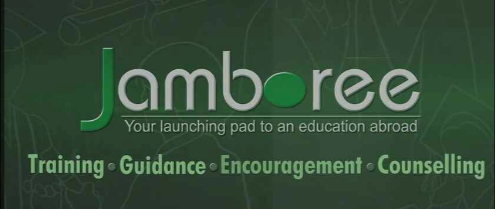

## **Problem Statement**

**Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.**

>> **Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.**

> **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

> **Importing libraries**

In [ ]:
!gdown 1aMSLaihmVC8aTGiNLAjwdY-qYIW9u85k

Downloading...
From: https://drive.google.com/uc?id=1aMSLaihmVC8aTGiNLAjwdY-qYIW9u85k
To: /content/jamboree_admission.csv
100% 16.2k/16.2k [00:00<00:00, 31.9MB/s]


In [ ]:
df = pd.read_csv('jamboree_admission.csv')

## **Exploratory Data Analysis**

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**check for missing values**

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Rename the 'LOR ' column to 'LOR' without the space - -**

In [ ]:
df.rename(columns={'LOR ': 'LOR'}, inplace=True)
df.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

**Remove serial number as it is not a feature required for prediction**

In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**cat_cols -**

In [ ]:
cat_cols = df[['University Rating', 'SOP', 'LOR']]

**numeric_cols -**

In [ ]:
numeric_cols = df[['GRE Score', 'TOEFL Score', 'CGPA', 'Research', 'Chance of Admit']]

##**Univariate Analysis & Bivariate Analysis**  

**Relationship between categorical variables and Chance of Admit**

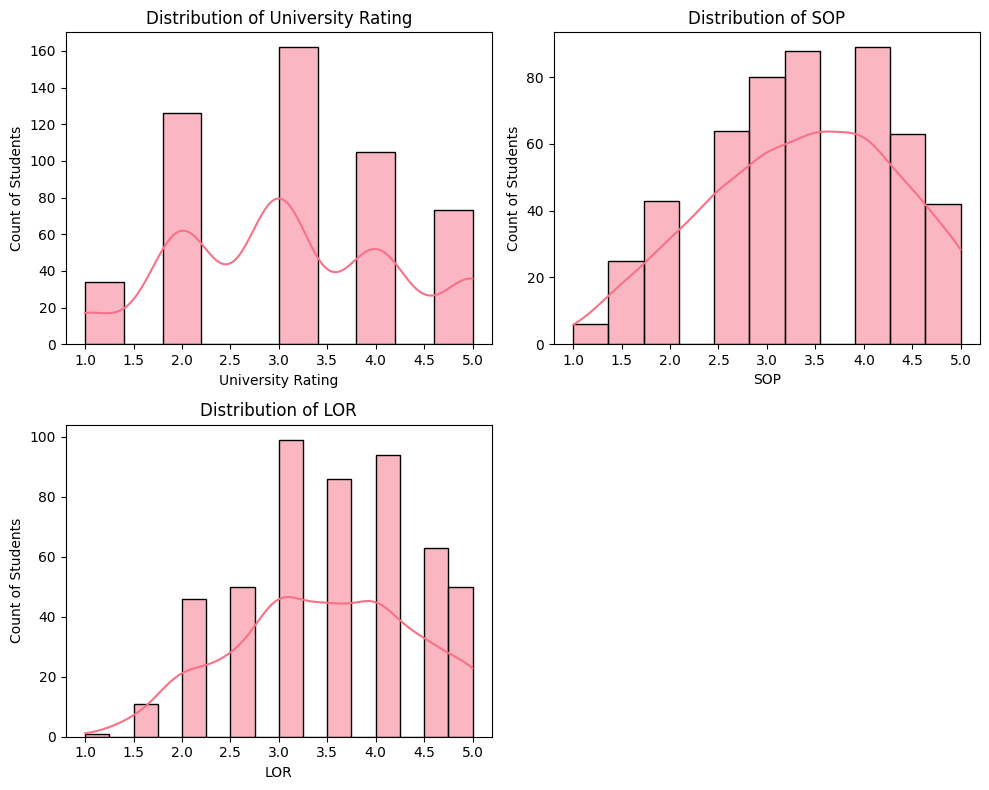

In [ ]:
# Define a color palette
palette = sns.color_palette("husl", len(cat_cols))

plt.figure(figsize=(10, 8))
i = 1
for col, color in zip(cat_cols, palette):
    ax = plt.subplot(2, 2, i)
    sns.histplot(data=df[col], kde=True, color=color)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i += 1

plt.tight_layout()
plt.show()


**Insights ⏩**

**University Rating Distribution:**

`The university rating seems to be distributed across a range of values.
There's no clear pattern in the distribution, but a significant portion of the ratings fall between 3 and 4.`

**SOP (Statement of Purpose) Distribution:**

`The distribution of SOP ratings appears to be somewhat skewed towards higher ratings.
Most of the ratings seem to be concentrated between 3.0 and 4.5.`

**LOR (Letter of Recommendation) Distribution:**

`The distribution of LOR ratings seems to be somewhat normally distributed.
Most of the ratings appear to be between 3.0 and 4.5.`

**Research Distribution:**

`The majority of applicants in the dataset seem to have research experience, as indicated by the higher frequency count for the value "1".`

`There is a significant number of applicants without research experience, although it appears to be lower compared to those with research experience.`


**Distribution of continuous numerical features**

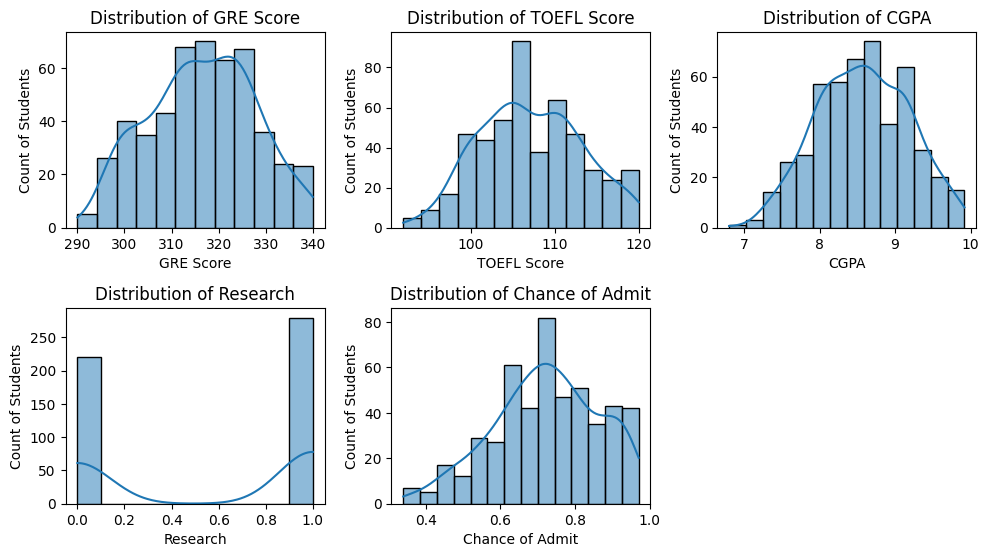

In [ ]:
plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(3,3,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show();

**Insights ⏩**

**GRE Score Distribution:**

`The distribution of GRE scores appears to be roughly normal, with a peak around 320-330.
Most of the scores seem to be concentrated between 310 and 330.`

**TOEFL Score Distribution:**

`The distribution of TOEFL scores appears to be somewhat normally distributed, with a peak around 105-110.
Most scores seem to be between 100 and 115.`


**CGPA Distribution:**

`The distribution of CGPA appears to be roughly normal, with a peak around 8.0-9.0.
Most CGPA scores seem to be between 8.0 and 9.5.`

**Chance of Admit Distribution:**

`The distribution of chances of admission seems to be skewed towards higher values.
Most of the chances of admission appear to be between 0.7 and 0.9.`

**Heatmap to analyse the correlation between numerical features and Chance of Admit**

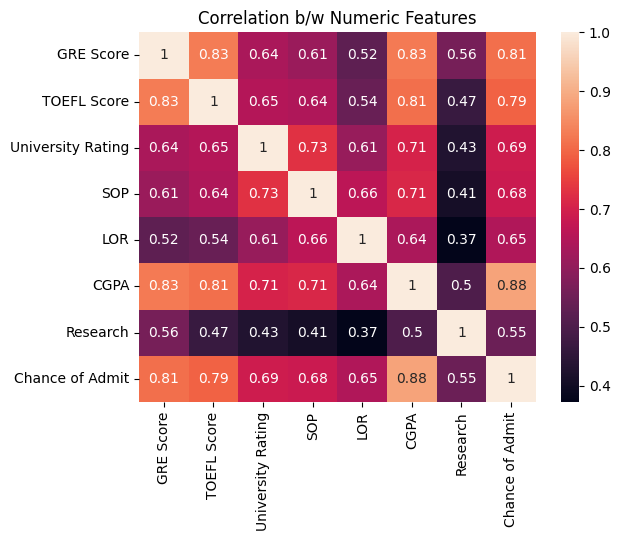

In [ ]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show()

**Insights ⏩**

* the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit

* Infact, they are also highly correlated amongst themselves

-------------------------------

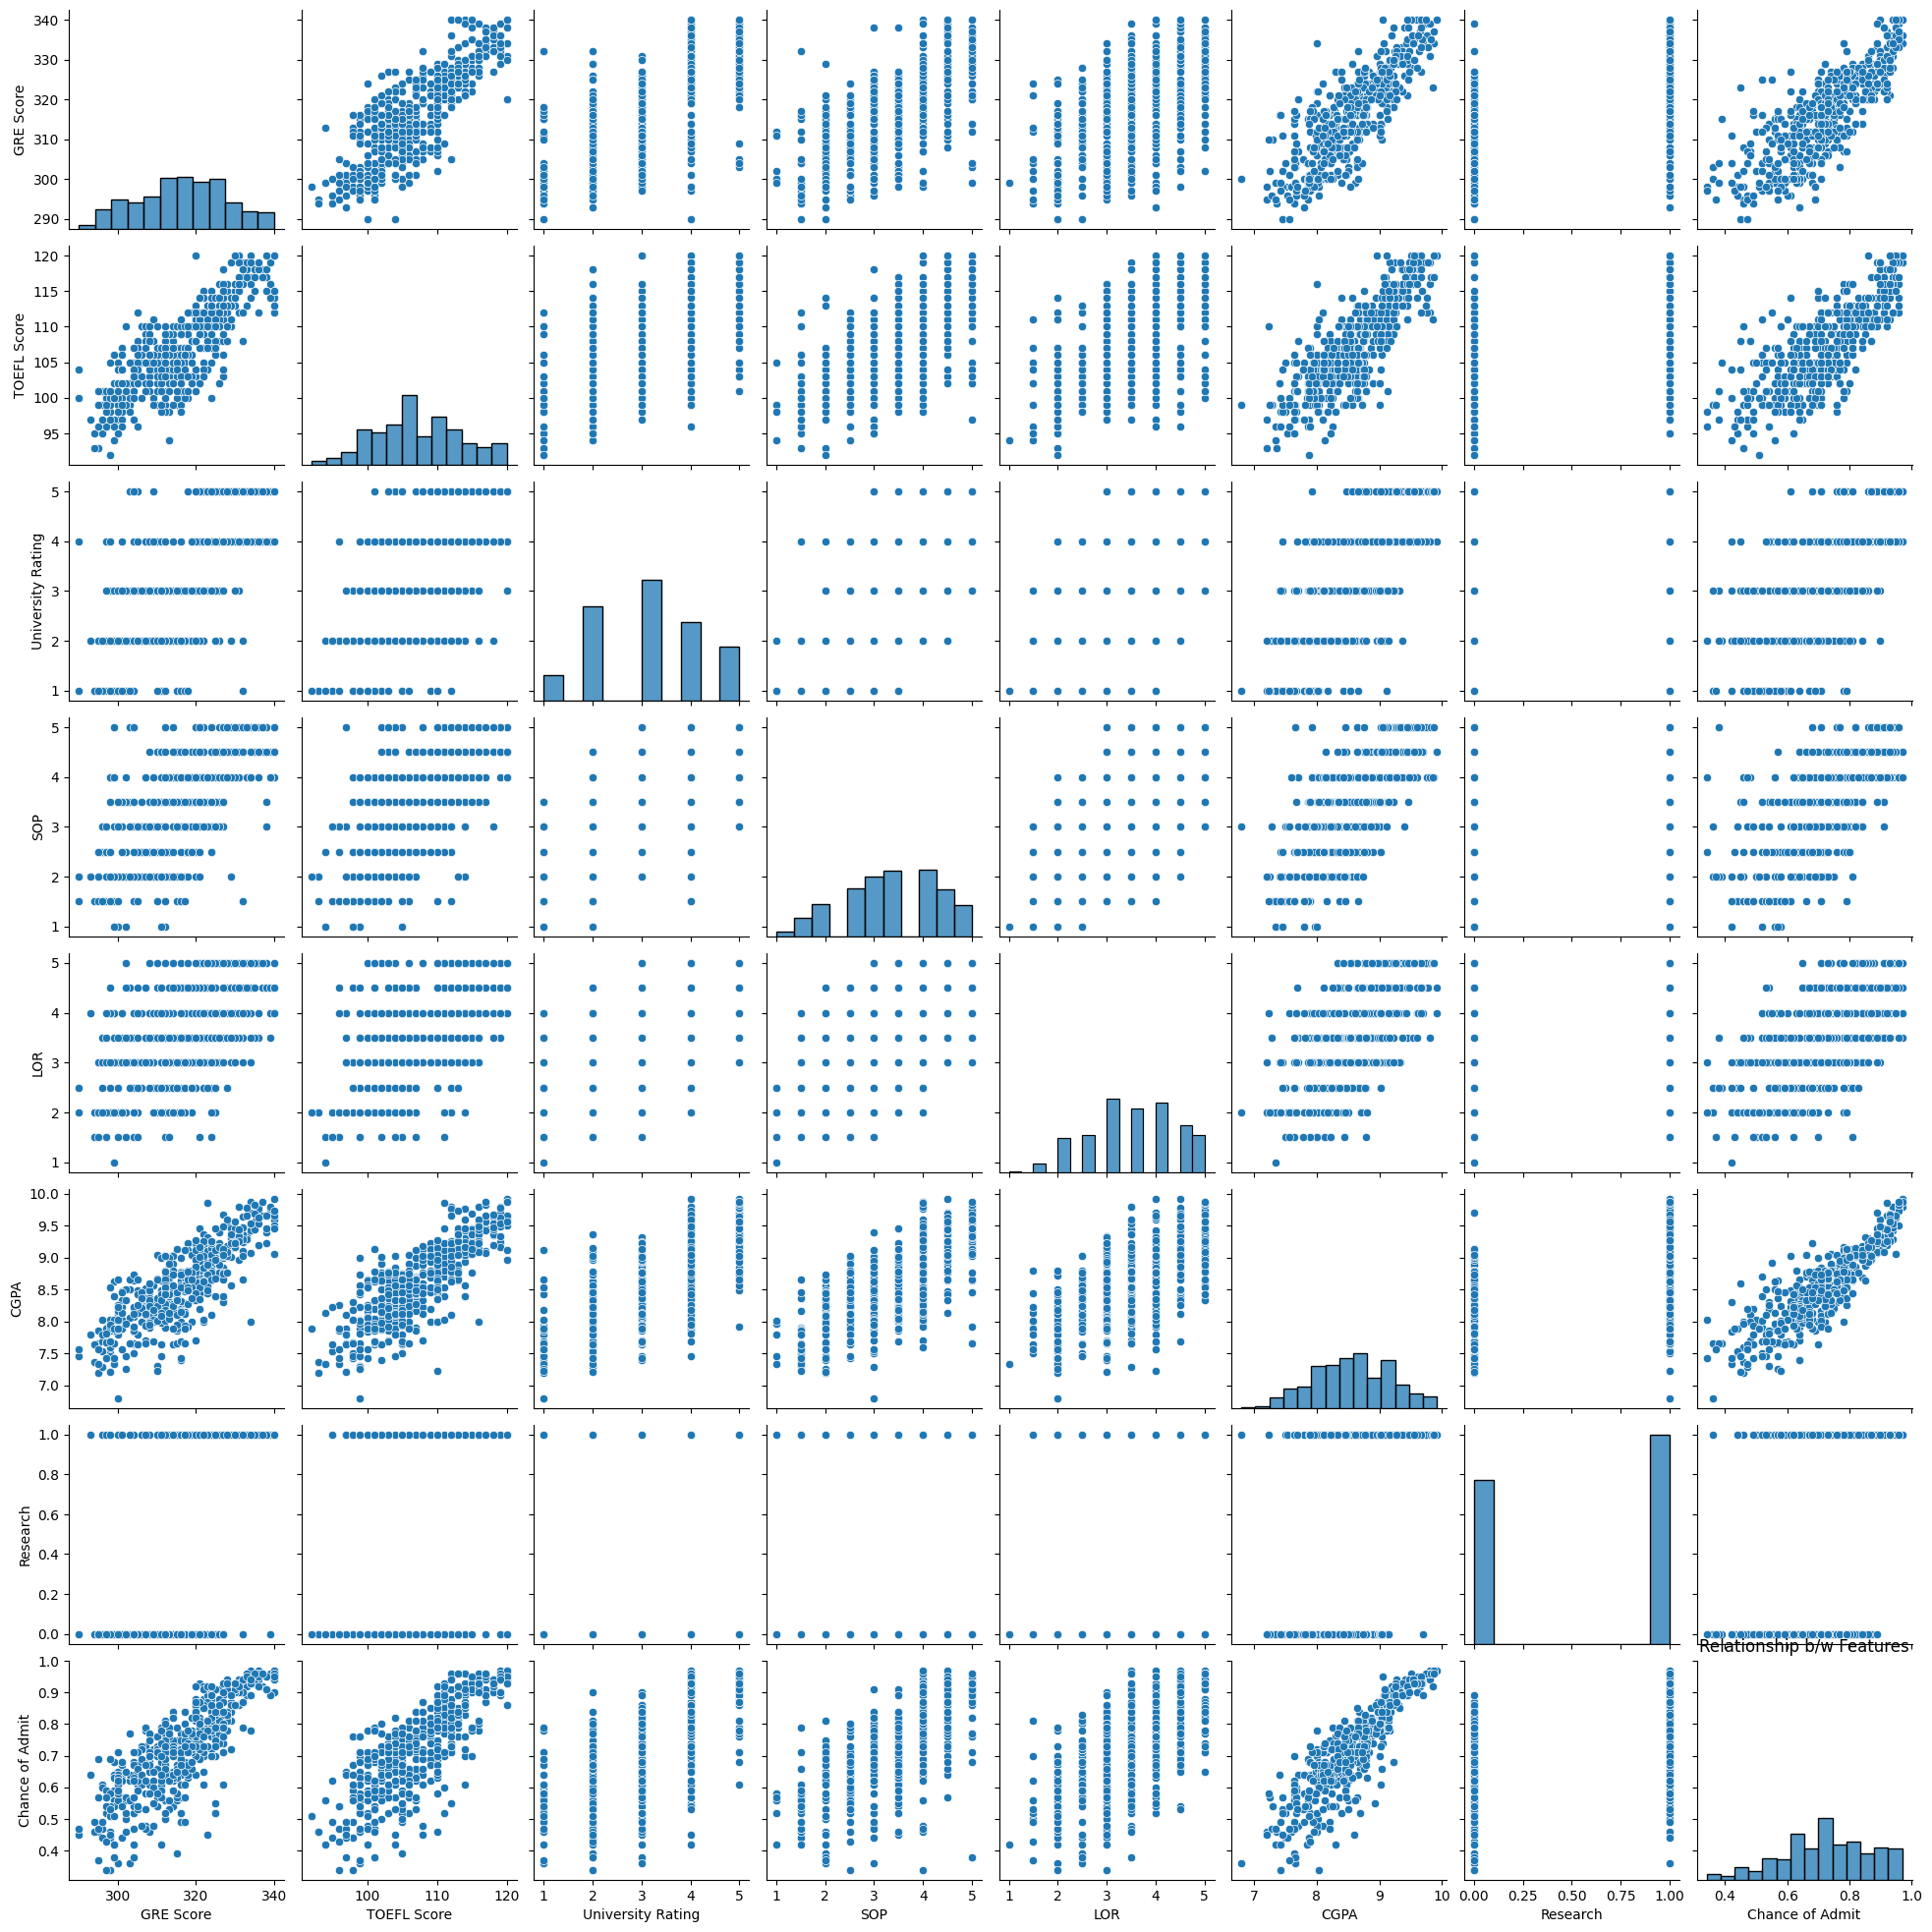

In [ ]:
sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show();

### **barplots/countplots of all the categorical variables**

**Insights ⏩**

**Selecting categorical variables : -**

<ipython-input-111-5d75045dc6a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_vars[0], data=df, palette='pastel', ax=ax)


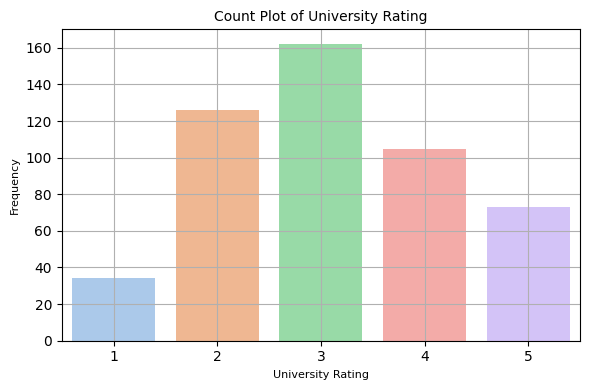

In [ ]:
# Selecting categorical variables
categorical_vars = ['University Rating']

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting bar plots for each categorical variable
sns.countplot(x=categorical_vars[0], data=df, palette='pastel', ax=ax)
ax.set_title(f'Count Plot of {categorical_vars[0]}', fontsize=10)
ax.set_xlabel(categorical_vars[0], fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



**Insights ⏩**

**Distribution of University Ratings:** `The count plot shows the distribution of applicants across different university ratings. From the plot, it appears that there are more applicants for university ratings 3 and 4 compared to other ratings.`

**Imbalance in Ratings:** `There seems to be a slight imbalance in the distribution of applicants across different university ratings. Ratings 3 and 4 have higher counts compared to ratings 1, 2, and 5.`

**Potential Bias:** `This imbalance might suggest that there is a bias towards universities with ratings 3 and 4, either due to reputation, location, or other factors. Further analysis could explore the reasons behind this bias and its implications for admission processes.`

**Application Trends:** `Understanding the distribution of applicants across different university ratings can help admission committees and consulting services like Jamboree tailor their services to cater to the needs of applicants targeting specific types of universities.`

**Decision-Making Insights:** `Knowing the popularity of universities based on their ratings can provide valuable insights for applicants in making informed decisions about where to apply, as well as for universities to understand their competitiveness in the applicant pool.`

## **Bivariate Analysis**

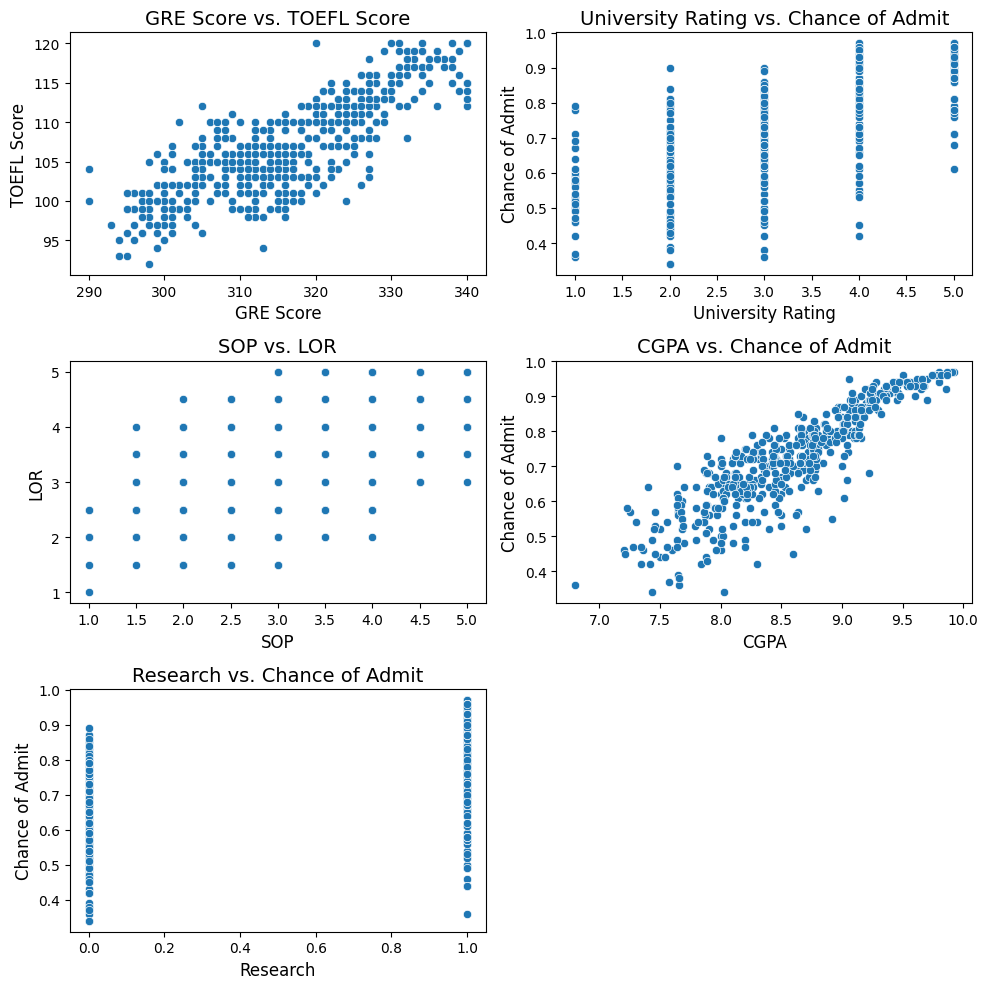

In [ ]:
# Define the bivariate relationships
bivariate_relationships = [
    ('GRE Score', 'TOEFL Score'),
    ('University Rating', 'Chance of Admit'),
    ('SOP', 'LOR'),
    ('CGPA', 'Chance of Admit'),
    ('Research', 'Chance of Admit')
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Plot each bivariate relationship
for i, (x_var, y_var) in enumerate(bivariate_relationships[:5]):  # Plot only the first 5 relationships
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{x_var} vs. {y_var}', fontsize=14)
    axes[i//2, i%2].set_xlabel(x_var, fontsize=12)
    axes[i//2, i%2].set_ylabel(y_var, fontsize=12)

# Remove empty subplot
fig.delaxes(axes[2,1])

# Adjust layout
plt.tight_layout()
plt.show()



**GRE Score vs. TOEFL Score:**

`There seems to be a positive correlation between GRE scores and TOEFL scores, indicating that students who score higher on the GRE tend to score higher on the TOEFL as well. This is expected as both exams assess academic proficiency and readiness for graduate-level studies.`

**University Rating vs. Chance of Admit:**

`Higher university ratings appear to correlate positively with a higher chance of admission. This suggests that applicants to universities with higher ratings have better chances of being admitted, which aligns with the common perception that more prestigious universities have more competitive admissions processes.`

**SOP vs. LOR:**

`There doesn't seem to be a clear correlation between Statement of Purpose (SOP) scores and Letter of Recommendation (LOR) scores. This indicates that the quality of an applicant's SOP may not necessarily be correlated with the quality of their LOR, or vice versa.`

**CGPA vs. Chance of Admit:**

`There appears to be a strong positive correlation between CGPA (Cumulative Grade Point Average) and the chance of admission. This suggests that applicants with higher CGPA scores have a greater chance of being admitted. It's a common expectation that academic performance, as reflected in CGPA, plays a significant role in graduate admissions decisions.`

**Research vs. Chance of Admit:**

`There seems to be a positive correlation between research experience and the chance of admission. Applicants with research experience appear to have a higher chance of admission compared to those without research experience. This suggests that research experience is valued by graduate admissions committees and may positively influence their decisions.`

# **Data Preprocessing**
> **Missing Values/Outliers/Duplicates Check**

### **Outliers detention and treatment**

In [ ]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers in a DataFrame using the IQR method.

    Parameters:
        data (DataFrame): Input DataFrame.
        threshold (float): Threshold value to determine outliers (default=1.5).

    Returns:
        outliers (DataFrame): DataFrame containing outliers.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers detection
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Find outliers
    outliers = data[((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return outliers

# Apply the function to detect outliers in the continuous variables
continuous_vars = numeric_cols
outliers = detect_outliers_iqr(df)

# Print the outliers
print("Outliers detected using IQR method:")
print(outliers)


Outliers detected using IQR method:
     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
92         298           98                  2  4.0  3.0  8.03         0   
347        299           94                  1  1.0  1.0  7.34         0   
376        297           96                  2  2.5  2.0  7.43         0   

     Chance of Admit  
92              0.34  
347             0.42  
376             0.34  


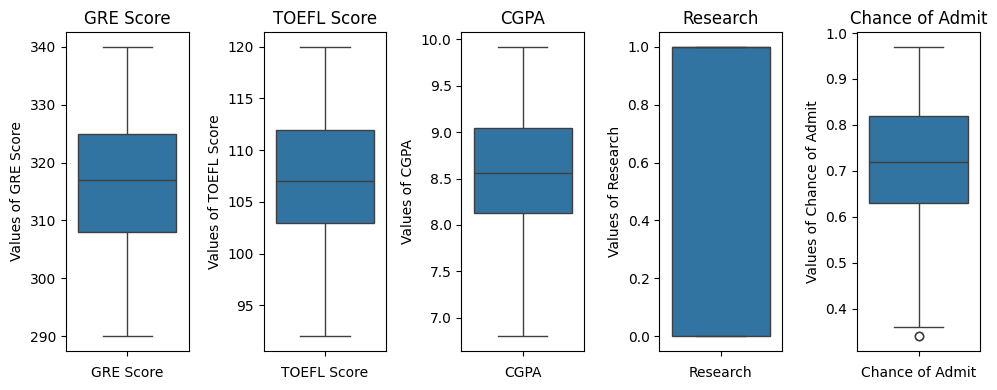

In [ ]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,5,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

**It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)**

In [ ]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## **Feature Engineering**



In [ ]:

# 1. Create a new feature for the total score, which is the sum of GRE Score, TOEFL Score, and CGPA
df['Total_Score'] = df['GRE Score'] + df['TOEFL Score'] + df['CGPA']

# 2. Create a new feature indicating whether the applicant has research experience and a high GRE score
df['High_GRE_With_Research'] = (df['GRE Score'] > 320) & (df['Research'] == 1)

# 3. Create a new feature indicating whether the applicant's SOP and LOR are above the average
avg_SOP_LOR = (df['SOP'] + df['LOR']) / 2
df['SOP_LOR_Above_Avg'] = avg_SOP_LOR > avg_SOP_LOR.mean()

# 4. Create a new feature for the interaction between University Rating and CGPA squared
df['UnivRating_CGPA_Squared_Interaction'] = df['University Rating'] * (df['CGPA'] ** 2)

# 5. Create a new feature indicating whether the applicant has a high chance of admission based on the mean admission chance
df['High_Chance_Admit'] = df['Chance of Admit'] > df['Chance of Admit'].mean()

# Display the updated DataFrame with new features
print(df.head())


   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance of Admit  Total_Score  High_GRE_With_Research  SOP_LOR_Above_Avg  \
0             0.92       464.65                    True               True   
1             0.76       439.87                    True               True   
2             0.72       428.00                   False              False   
3             0.80       440.67                    True              False   
4             0.65       425.21                   False              False   

   UnivRating_CGPA_Squared_Interaction  High_Chance_Admit  
0                         

**Insights ⏩**

**Total_Score:** `This feature represents the total score of each applicant, which is the sum of GRE Score, TOEFL Score, and CGPA. It can provide a holistic view of the applicant's academic performance.`

**High_GRE_With_Research:**`This binary feature indicates whether an applicant has a high GRE score (>320) and research experience. It may capture the importance of both academic excellence and research experience in graduate admissions.`

**SOP_LOR_Above_Avg:** `This binary feature indicates whether an applicant's average SOP and LOR scores are above the overall average. It may capture the impact of strong recommendation letters and statement of purpose on admission chances.`

**UnivRating_CGPA_Squared_Interaction:** `This feature represents the interaction between University Rating and the square of CGPA. It can capture potential nonlinear relationships between university rating, academic performance, and admission chances.`

**High_Chance_Admit:** `This binary feature indicates whether an applicant has a high chance of admission based on the mean admission chance in the dataset. It may help identify applicants with significantly higher chances of admission.`

**Spliting the data for Model building**

> **Train-Test Split**

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of x_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of x_train: (400, 12)
Shape of x_test: (100, 12)
Shape of y_train: (400,)
Shape of y_test: (100,)


>## **Standardisation**

In [ ]:
x_cat_encoded = pd.concat([X_train, X_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Total_Score,High_GRE_With_Research,SOP_LOR_Above_Avg,UnivRating_CGPA_Squared_Interaction,High_Chance_Admit
249,321,111,3,3.5,4.0,8.83,1,440.83,True,True,233.9067,True
433,316,111,4,4.0,5.0,8.54,0,435.54,False,True,291.7264,False
19,303,102,3,3.5,3.0,8.50,0,413.50,False,False,216.7500,False
322,314,107,2,2.5,4.0,8.27,0,429.27,False,False,136.7858,False
332,308,106,3,3.5,2.5,8.21,1,422.21,False,False,202.2123,True
56,316,102,3,2.0,3.0,7.40,0,425.40,False,False,164.2800,False
301,319,108,2,2.5,3.0,8.76,0,435.76,False,False,153.4752,False
229,324,111,4,3.0,3.0,9.01,1,444.01,True,False,324.7204,True
331,311,105,2,3.0,2.0,8.12,1,424.12,False,False,131.8688,True
132,309,105,5,3.5,3.5,8.56,0,422.56,False,True,366.3680,False


In [ ]:
# Convert True/False columns to 1/0
df['High_GRE_With_Research'] = df['High_GRE_With_Research'].astype(int)
df['SOP_LOR_Above_Avg'] = df['SOP_LOR_Above_Avg'].astype(int)
df['High_Chance_Admit'] = df['High_Chance_Admit'].astype(int)

# Display the modified DataFrame
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
495        332          108                  5  4.5  4.0  9.02         1   
496        337          117                  5  5.0  5.0  9.87         1   
497        330          120                  5  4.5  5.0  9.56         1   
498        312          103                  4  4.0  5.0  8.43         0   
499        327          113                  4  4.5  4.5  9.04         0   

     Chance of Admit  Total_Score  High_GRE_With_Research  SOP_LOR_Above_Avg  \
0      

In [ ]:
#Import the MinMaxScaler class from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

#Initialising object of class MinMaxScaler() for Standardisation
scaler_x = MinMaxScaler()

#Fitting scaler_x to the training data
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [ ]:
all_cols = X_train.columns

#Transforming numeric columns of x_train and x_test
X_train[all_cols]=scaler_x.transform(X_train[all_cols])
X_test[all_cols]=scaler_x.transform(X_test[all_cols])

# **Base Model: Linear Regression**

### **Model building**

* **Build the Linear Regression model and comment on the model statistics**

* **Display model coefficients with column names**

* **Try out Ridge and Lasso regression**

In [ ]:
#Initialising object of Class LinearRegression()
model_lr = LinearRegression()
# Fitting the model to the training data
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting values for the training and test data

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

**Evaluating the model using multiple loss functions**

In [ ]:

def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")


**Metrics for training data**

In [ ]:
model_evaluation(y_train.values, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.05
R2 Score: 0.86
Adjusted R2: 0.86


**Metrics for test data**

In [ ]:
model_evaluation(y_test.values, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.84
Adjusted R2: 0.82


**Insights ⏩**

**Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model**

* `Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%`
* `Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%`
* `R2 Score of 0.82 means that our model captures 82% variance in the data`
* `Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction`

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Total_Score,High_GRE_With_Research,SOP_LOR_Above_Avg,UnivRating_CGPA_Squared_Interaction,High_Chance_Admit
249,0.62,0.678571,0.50,0.625,0.750,0.650641,1.0,0.615008,1.0,1.0,0.421912,1.0
433,0.52,0.678571,0.75,0.750,1.000,0.557692,0.0,0.544997,0.0,1.0,0.551902,0.0
19,0.26,0.357143,0.50,0.625,0.500,0.544872,0.0,0.253309,0.0,0.0,0.383340,0.0
322,0.48,0.535714,0.25,0.375,0.750,0.471154,0.0,0.462017,0.0,0.0,0.203565,0.0
332,0.36,0.500000,0.50,0.625,0.375,0.451923,1.0,0.368581,0.0,0.0,0.350657,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.78,0.678571,0.75,0.875,0.875,0.762821,1.0,0.725516,1.0,1.0,0.653888,1.0
270,0.32,0.464286,0.25,0.375,0.500,0.455128,1.0,0.329010,0.0,0.0,0.199858,0.0
348,0.24,0.250000,0.00,0.250,0.250,0.144231,0.0,0.183827,0.0,0.0,0.014214,0.0
435,0.38,0.464286,0.25,0.375,0.750,0.282051,0.0,0.361567,0.0,0.0,0.161252,0.0


In [ ]:
# Print feature weights directly from coefficients
for feature, weight in zip(X_train.columns, model_lr.coef_):
    print(f"Weight of {feature}: {np.round(weight, 2)}")


Weight of GRE Score: -1030850750296.03
Weight of TOEFL Score: -577276420165.75
Weight of University Rating: -0.09
Weight of SOP: 0.02
Weight of LOR: 0.08
Weight of CGPA: -64325086818.24
Weight of Research: 0.01
Weight of Total_Score: 1557821653847.49
Weight of High_GRE_With_Research: -0.01
Weight of SOP_LOR_Above_Avg: -0.03
Weight of UnivRating_CGPA_Squared_Interaction: 0.14
Weight of High_Chance_Admit: 0.09


In [ ]:
# Bias Term of the Model

model_lr.intercept_

114630603433.3218

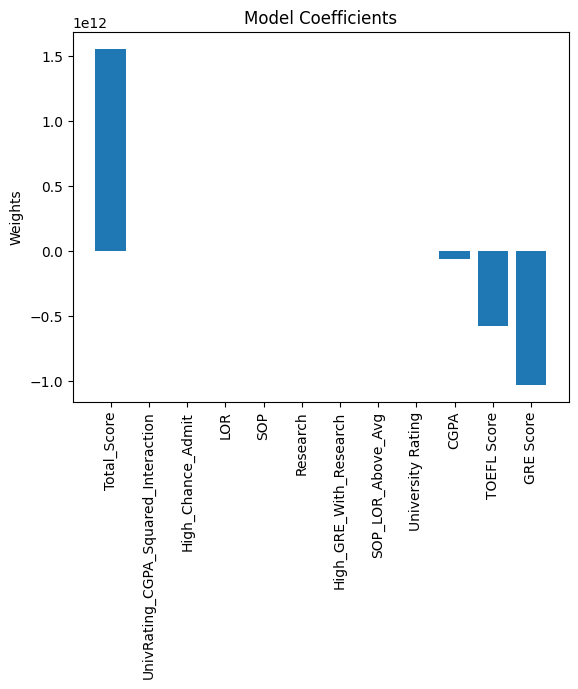

In [ ]:
model_weights=list(zip(X_train.columns, model_lr.coef_))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

### **Testing Assumptions of Linear Regression Model**

> **Multicolinearity Check**

**`VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.`**

In [ ]:
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,1166.959809
1,TOEFL Score,398.318882
2,University Rating,46.592578
3,SOP,3.518077
4,LOR,2.629833
5,CGPA,78.181966
6,Research,1.964197
7,Total_Score,2485.470737
8,High_GRE_With_Research,3.272919
9,SOP_LOR_Above_Avg,3.369941


**Insights ⏩**

**We see that almost all the variables have a very high level of colinearity- GRE score, TOEFL score and CGPA, University Rating, 	UnivRating_CGPA_Squared_Interaction**

### **Mean of Residuals**

> **`The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.`**





In [ ]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  0.0007265014648437501


**Insights ⏩**

**Since the mean of residuals is very close to 0, we can say that the model is unbiased**

## **Linearity of Variables**

`Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.`



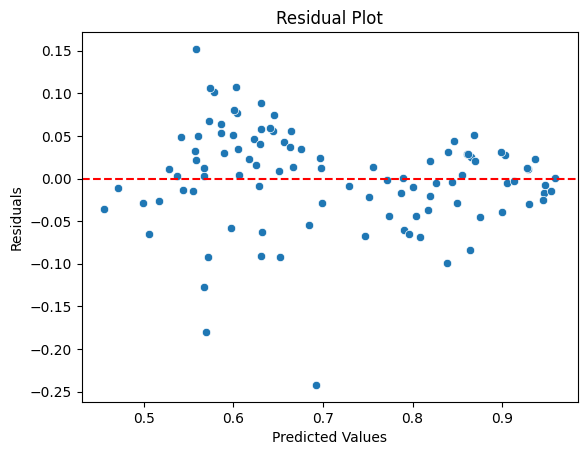

In [ ]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

**Insights ⏩**

**Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists**



## **Homoscedasticity**


**`Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.`**

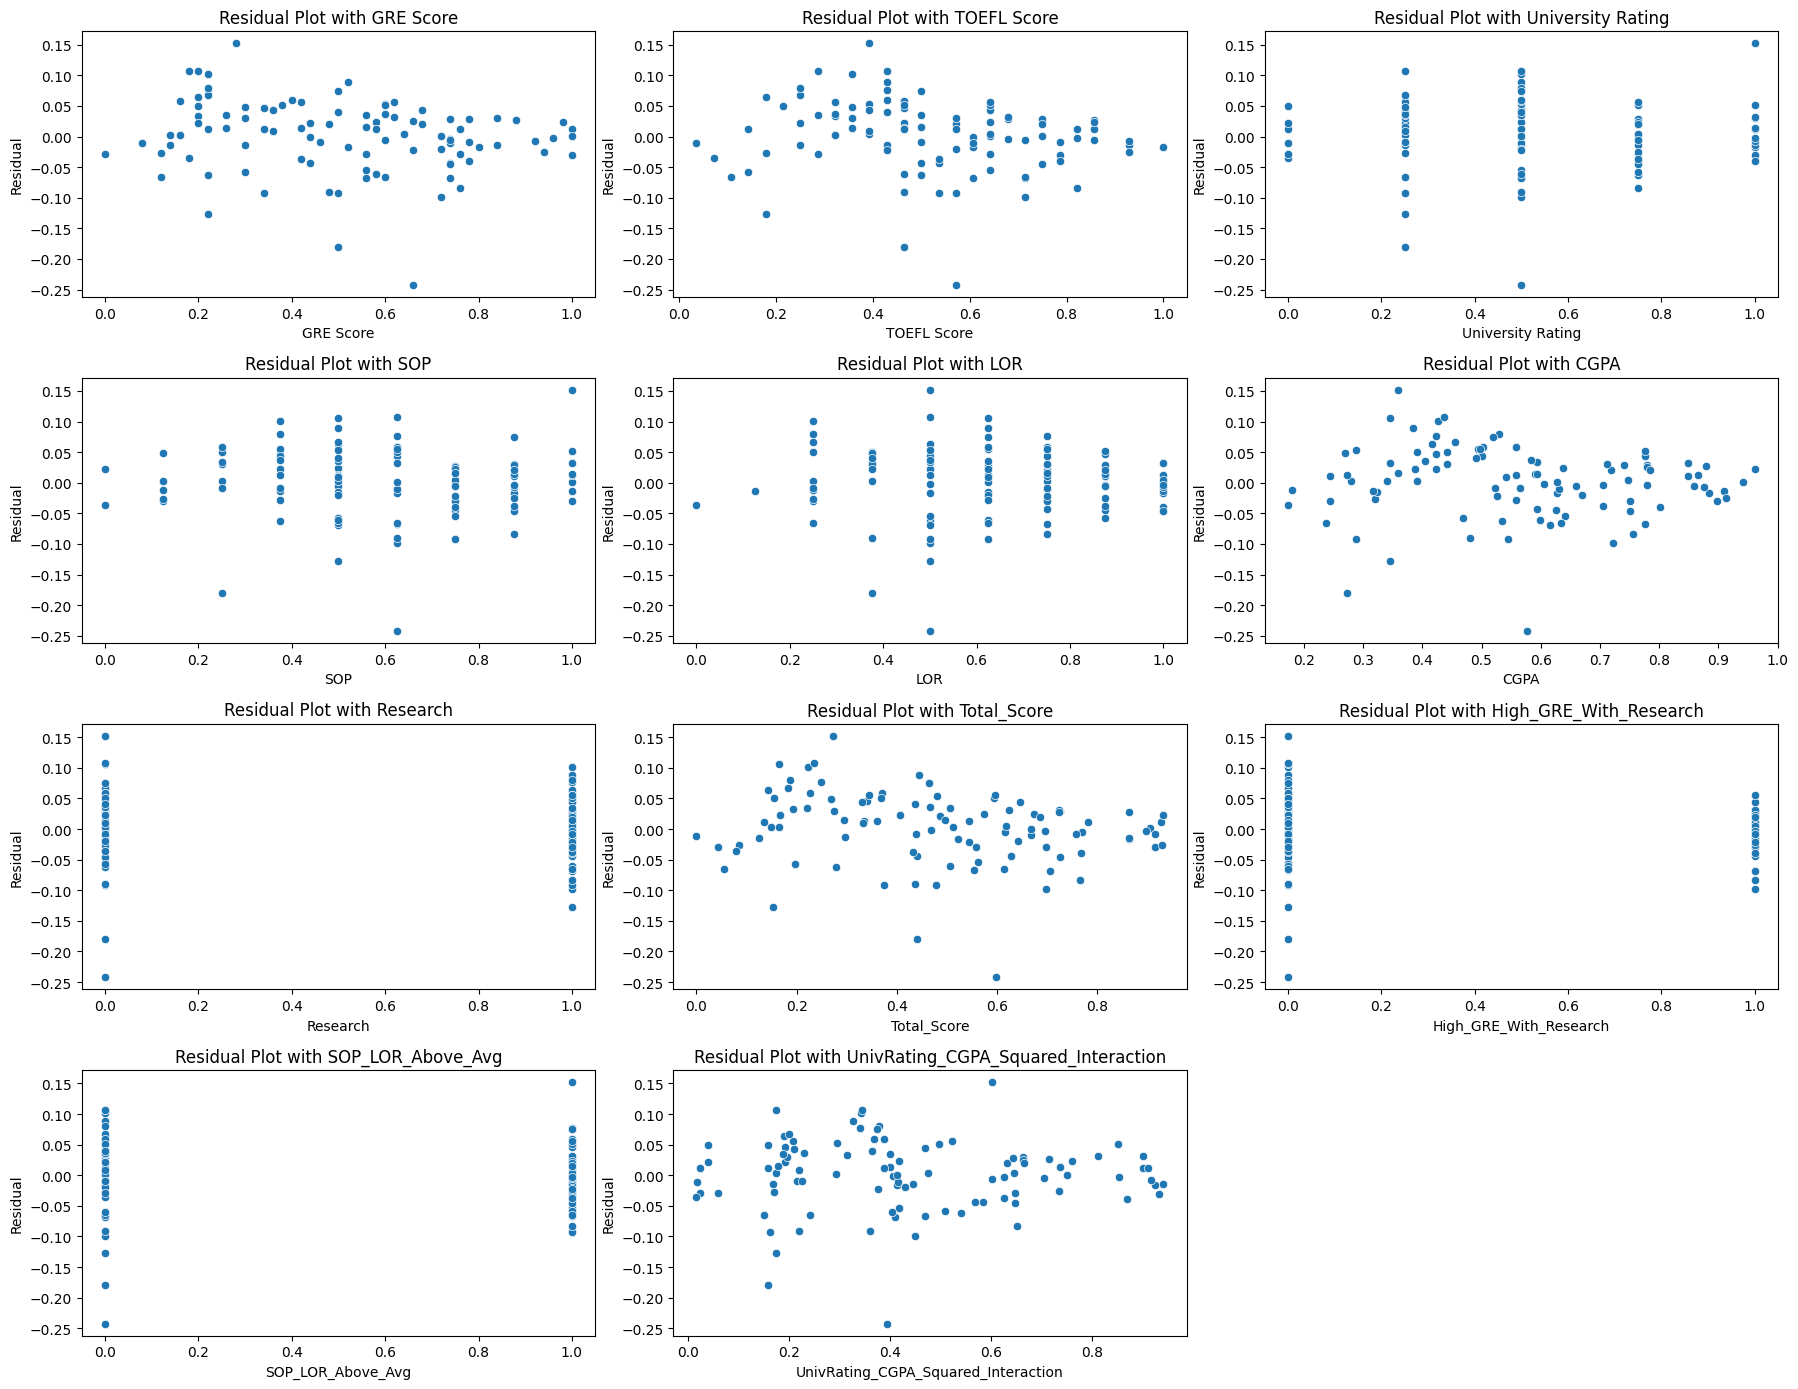

In [ ]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(18,14))
i=1
for col in X_test.columns[:-1]:
  ax = plt.subplot(4,3,i)
  sns.scatterplot(x=X_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

**Insights ⏩**

**Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.**

## **Normality of Residuals**

> **`Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.`**

> **`The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.`**

**Histogram of Residuals**

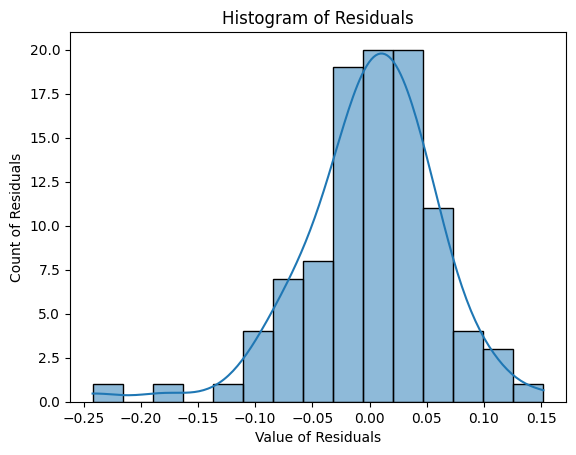

In [ ]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

**Insights ⏩**

**The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution**



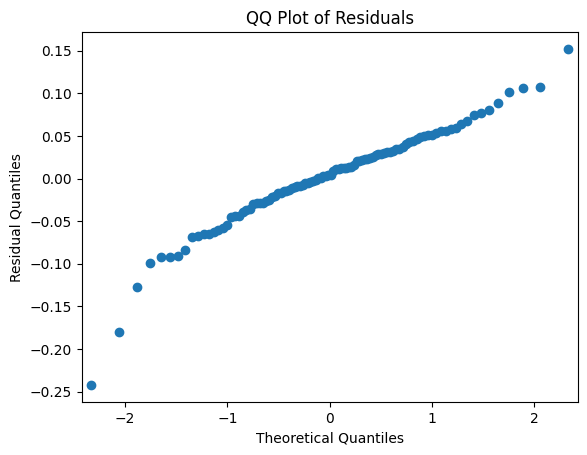

In [ ]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

# **Lasso and Ridge Regression**

**Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.**

**Ridge Regression:**.

**`Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).`**

**Lasso Regression:**

**`Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.`**

**Initialising instance of Ridge and Lasso classes**

In [ ]:

model_ridge = Ridge()
model_lasso = Lasso()

**Fitting the models to training data**

In [ ]:

model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

Lasso()

**Predicting values for train and test data**

In [ ]:
y_train_ridge = model_ridge.predict(X_train)
y_test_ridge = model_ridge.predict(X_test)

y_train_lasso = model_lasso.predict(X_train)
y_test_lasso = model_lasso.predict(X_test)

**Evaluating Model Performance**

In [ ]:

print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.05
R2 Score: 0.86
Adjusted R2: 0.86


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.03


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.15


**Insights ⏩**

**While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data**

> ## **Identifying Best Model**

**Actual v/s Predicted values for training data**

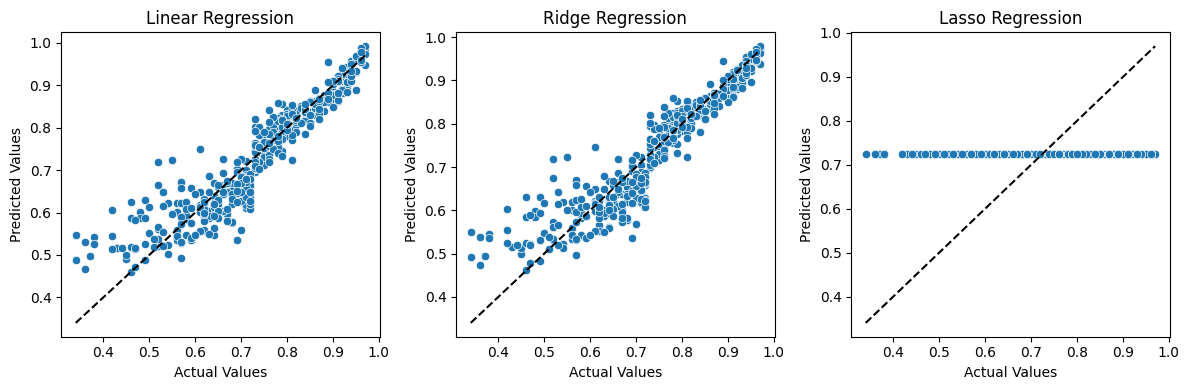

In [ ]:


actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show();

**Insights ⏩**

* **We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.**

* **This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.**

## **Insights & Recommendations**


**Insights:**

* **`The distribution of target variable (chances of admit) is left-skewed
Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves
the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.`**

* **`From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant`**

* **`Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.`**

* **`Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.`**


**Recommendations:**

* **`Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.`**

* **`Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables`**